In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("d:\\FSDS\\SELF FOLDER\\algerian+forest+fires+dataset\\Algerian_forest_fires_dataset_UPDATE.csv",skiprows=1)

In [3]:
df.columns = df.columns.str.strip()

In [4]:
Abbes_df =  df.iloc[124:]
Bejaia_df = df.iloc[0:122]
Abbes_df.reset_index(drop=True,inplace=True)
Abbes_df.dropna(inplace=True)
Abbes_df['region'] = "Abbes"
Bejaia_df['region'] = "Bejaia"


In [5]:
new_df  = pd.concat([Abbes_df,Bejaia_df],ignore_index=True)


In [6]:
x=[]
for i in new_df['Classes']:
    #print(i)
    try:
        x.append(i.strip())
    except:
        i="NA"
        x.append(i)
new_df['Classes'] = x

In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  region       243 non-null    object
dtypes: object(15)
memory usage: 28.6+ KB


In [8]:

for column in new_df.columns:
    print(column,":", pd.api.types.infer_dtype(new_df[column]))


day : string
month : string
year : string
Temperature : string
RH : string
Ws : string
Rain : string
FFMC : string
DMC : string
DC : string
ISI : string
BUI : string
FWI : string
Classes : string
region : string


In [9]:
#--------------------------- Changing the datatype of columns

for i in new_df.columns:
    try:
        new_df[i] = new_df[i].astype('int')
    except:
        try:
            new_df[i] = new_df[i].astype('float')
        except:
            try:
                new_df[i] = new_df[i].astype('str')
            except exception as e:
                print(e)

In [10]:
LEC = LabelEncoder()
for i in new_df.select_dtypes(include = "object").columns:
    new_df[i] = LEC.fit_transform(new_df[i])
    

In [11]:
for i in new_df.select_dtypes(include = "object").columns:
    print(i)

In [12]:
new_df['region'].unique()

array([0, 1])

In [13]:
new_df.drop(columns = ['day','year'],inplace=True)

In [14]:
new_df.describe()



,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,7.502058,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.436214,0.502058
std,1.114793,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,6.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,7.000000,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,8.000000,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000,1.000000
75%,8.000000,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,9.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [15]:
new_df.columns

Index(['month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [16]:
new_df.sort_values(by = 'RH').head(n=15)[["RH",'Temperature']]

,RH,Temperature
71,21,39
76,24,42
106,26,33
49,29,36
70,31,40
108,33,36
62,33,39
72,34,35
61,34,40
111,34,35


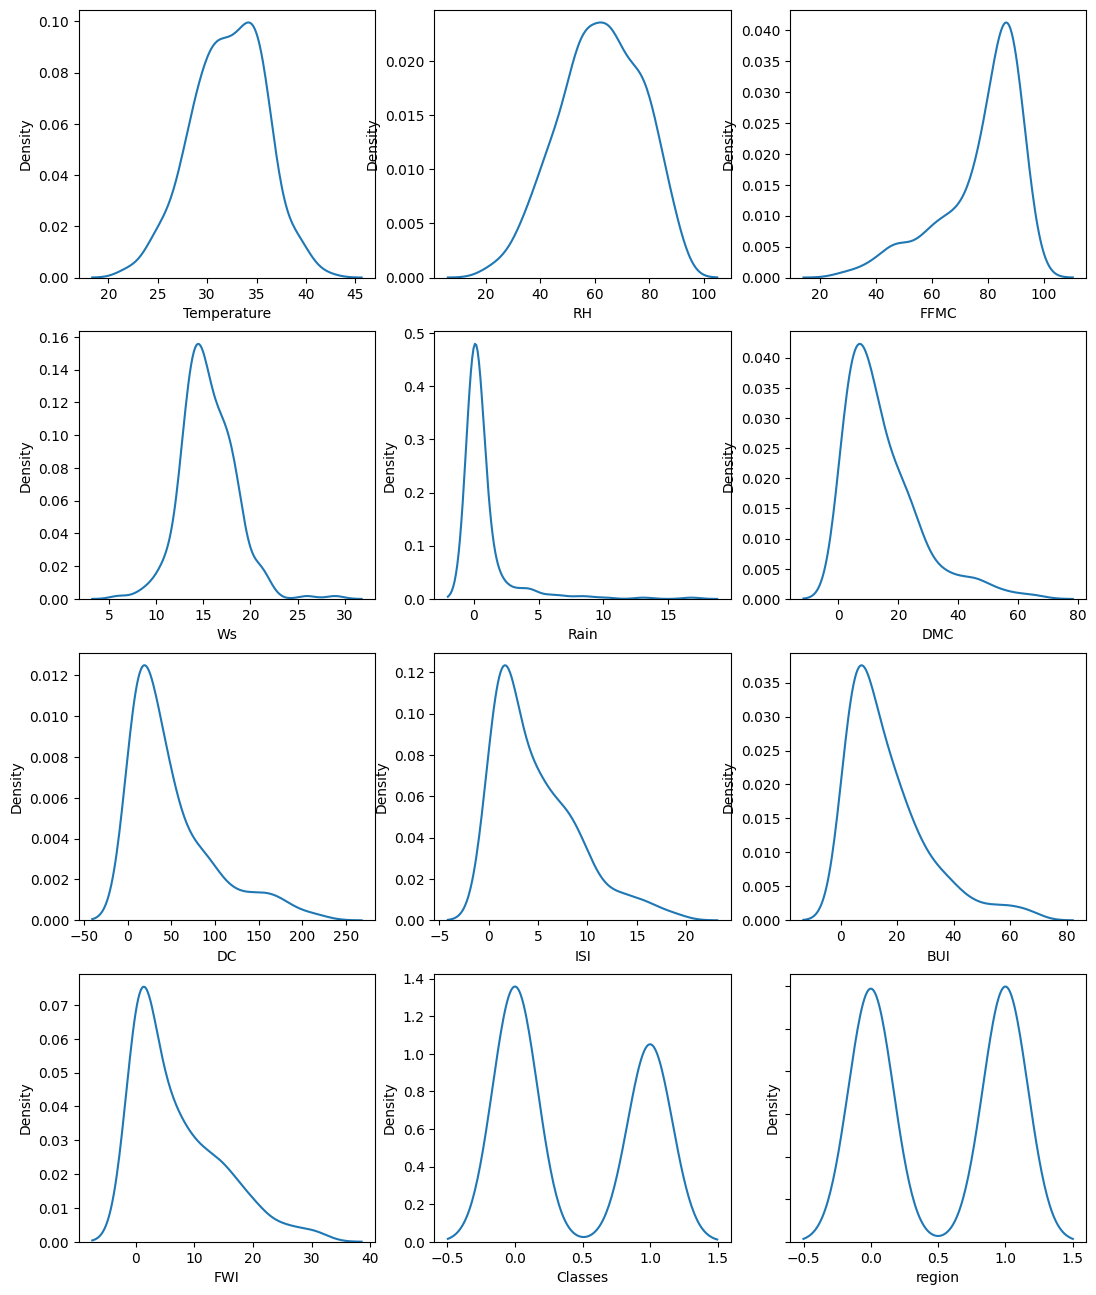

In [17]:
figure, axis = plt.subplots(4, 3,figsize = (13,16))
sns.kdeplot(x ='Temperature',data = new_df,ax = axis[0,0])
sns.kdeplot(x ='RH',data = new_df,ax = axis[0,1])
sns.kdeplot(x ='FFMC',data = new_df,ax = axis[0,2])
sns.kdeplot(x ='Ws',data = new_df,ax = axis[1,0])
sns.kdeplot(x ='Rain',data = new_df,ax = axis[1,1])
sns.kdeplot(x ='DMC',data = new_df,ax = axis[1,2])
sns.kdeplot(x ='DC',data = new_df,ax = axis[2,0])
sns.kdeplot(x ='ISI',data = new_df,ax = axis[2,1])
sns.kdeplot(x ='BUI',data = new_df,ax = axis[2,2])
sns.kdeplot(x ='FWI',data = new_df,ax = axis[3,0])
sns.kdeplot(x ='Classes',data = new_df,ax = axis[3,1])
sns.kdeplot(x ='region',data = new_df,ax = axis[3,2])
plt.tick_params(axis = 'y',which = 'both',labelleft = False)
plt.show()

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

transformer = ColumnTransformer(transformers=[('tnf1',StandardScaler(),["RH","Ws"]),
('tnf2',MinMaxScaler(),["Rain","FFMC","DMC","DC","ISI","BUI","FWI"])

],remainder= 'passthrough',verbose_feature_names_out=False)


In [19]:

transformer.set_output(transform="pandas")
df_pandas = transformer.fit_transform(new_df)
df_pandas[['RH','Temperature']].tail(n=20)

,RH,Temperature
223,1.010896,30
224,1.754259,29
225,1.619102,25
226,0.943317,22
227,1.348788,24
228,0.199954,30
229,-0.678565,31
230,-0.881301,32
231,-0.340673,29
232,1.483945,28


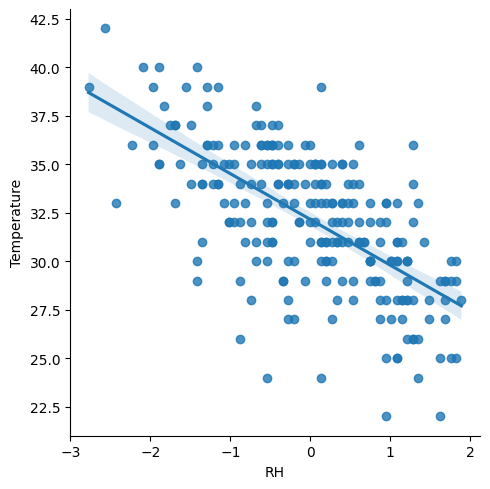

In [20]:
sns.lmplot(data = df_pandas, x = 'RH', y = 'Temperature')

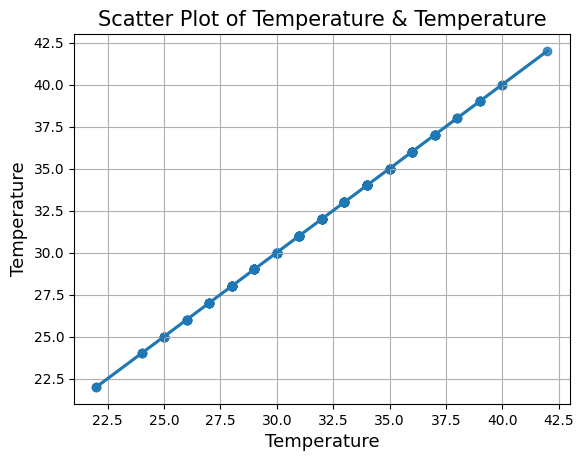

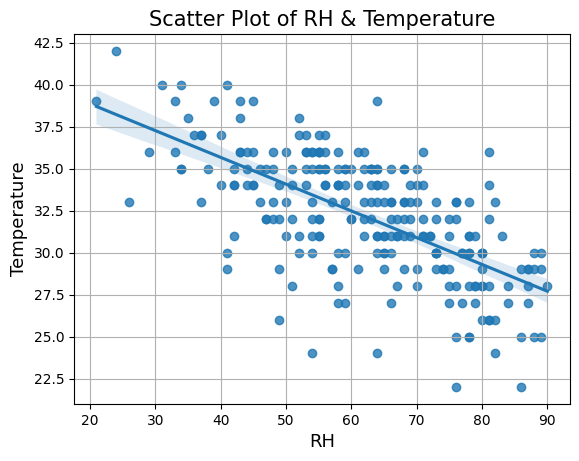

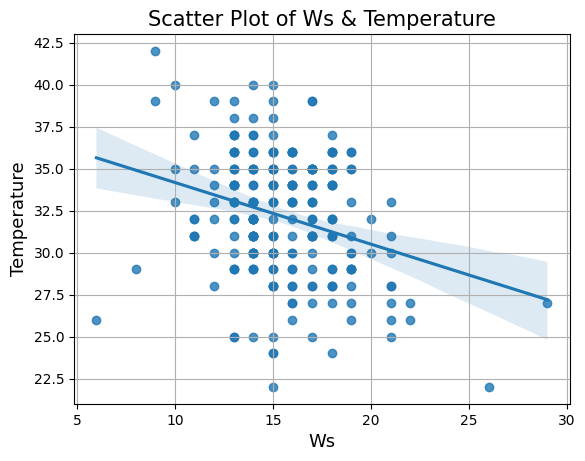

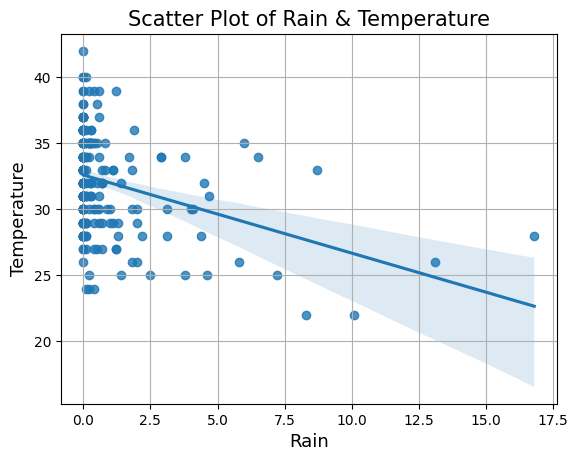

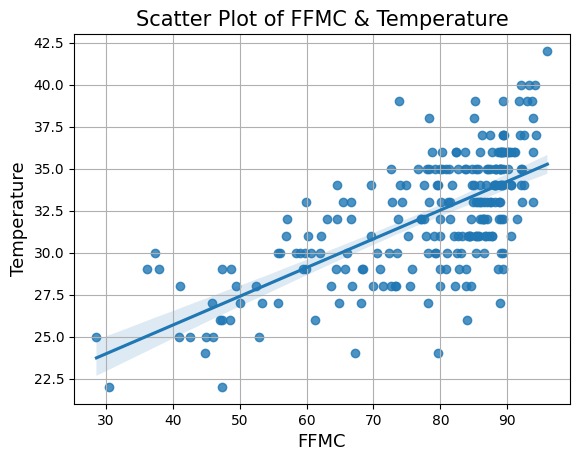

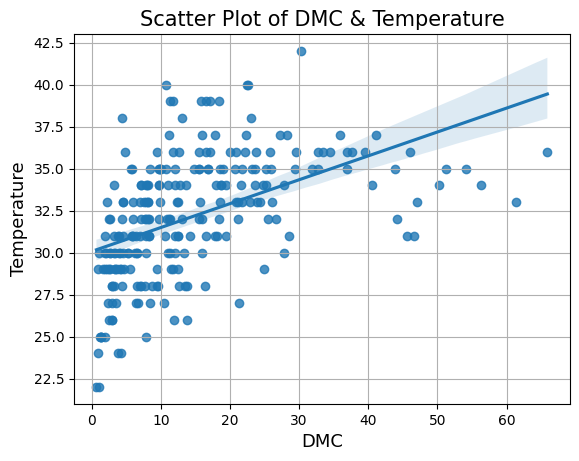

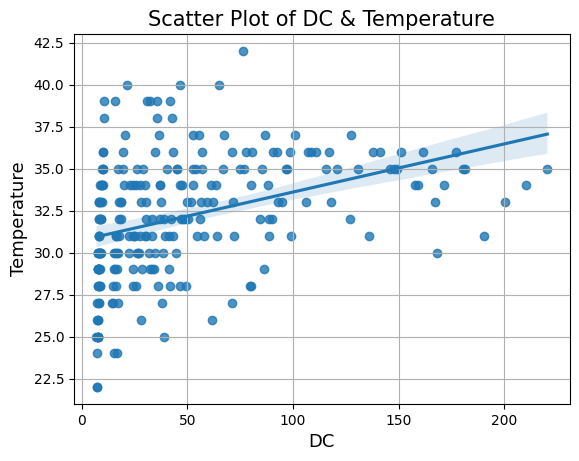

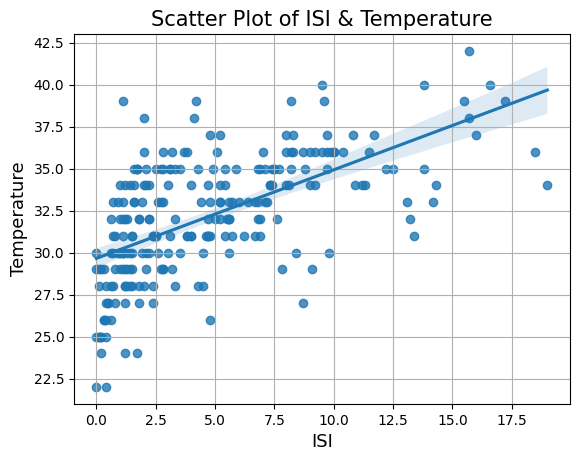

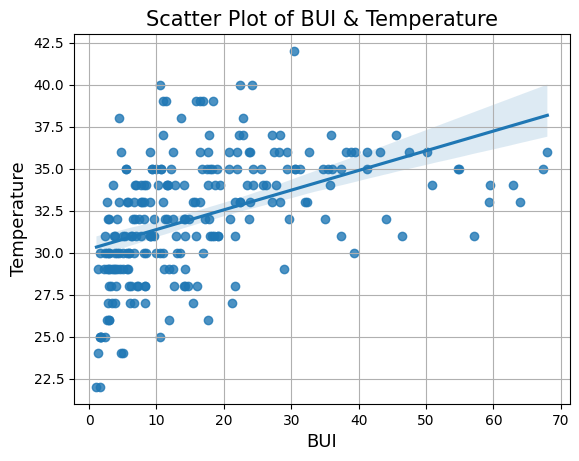

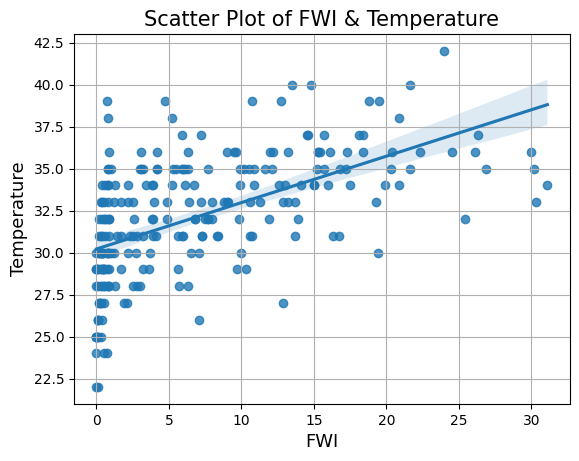

In [21]:
numeric_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI','BUI', 'FWI']

x_axis = numeric_features
y = "Temperature"

for col in x_axis:
    sns.regplot(x = col, y = y, data = new_df)
    plt.xlabel(col, fontsize = 13)
    plt.ylabel(y, fontsize = 13)
    plt.title("Scatter Plot of " + col + " & " + y, fontsize = 15)
    plt.grid()
    plt.show()

In [22]:
from sklearn.model_selection import train_test_split
X = new_df.drop(columns="Temperature")
y = new_df["Temperature"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
X_train_unscl, X_test_unscl, y_train_unscl, y_test_unscl = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
y_train

226    22
65     30
168    31
206    35
144    32
       ..
106    33
14     28
92     28
179    32
102    31
Name: Temperature, Length: 162, dtype: int32

In [25]:

transformer.set_output(transform="pandas")
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [26]:
X_test.head(n=10)

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,month,Classes,region
24,0.586483,0.083407,0.000000,0.847328,0.199670,0.087160,0.284211,0.174962,0.221122,6,0,0
6,-1.176734,0.429867,0.011905,0.841221,0.151815,0.102624,0.284211,0.144796,0.198020,6,0,0
152,0.925563,1.122787,0.071429,0.384733,0.028053,0.006092,0.042105,0.025641,0.009901,7,1,1
232,1.535907,0.776327,0.000000,0.813740,0.211221,0.198219,0.236842,0.224736,0.207921,9,0,1
238,-0.498573,-1.648893,0.000000,0.786260,0.087459,0.043580,0.131579,0.076923,0.056106,9,1,1
175,0.247403,0.776327,0.000000,0.821374,0.194719,0.382849,0.252632,0.262443,0.240924,7,0,1
215,1.129011,-0.263053,0.226190,0.184733,0.008251,0.002343,0.005263,0.009050,0.000000,9,1,1
150,-0.769838,-0.609513,0.000000,0.888550,0.366337,0.402062,0.378947,0.410256,0.425743,6,0,1
9,-1.380182,-0.263053,0.000000,0.899237,0.207921,0.072634,0.442105,0.180995,0.330033,6,0,0
113,-0.362941,-0.609513,0.000000,0.893130,0.473597,0.508903,0.394737,0.526395,0.501650,9,0,0


In [27]:
regression=LinearRegression()

regression.fit(X_train,y_train)

LinearRegression()

In [28]:
print(regression.coef_)
print(regression.intercept_)
reg_pred = regression.predict(X_test)

[-1.42276534 -0.65357209 -0.77196161  3.68486458 -0.90998746  3.00509522
  2.69226705  1.67188315 -2.7646804  -0.13835677 -0.32620012 -0.19983838]
30.101431852613985


Text(0, 0.5, 'Test Predicted Data')

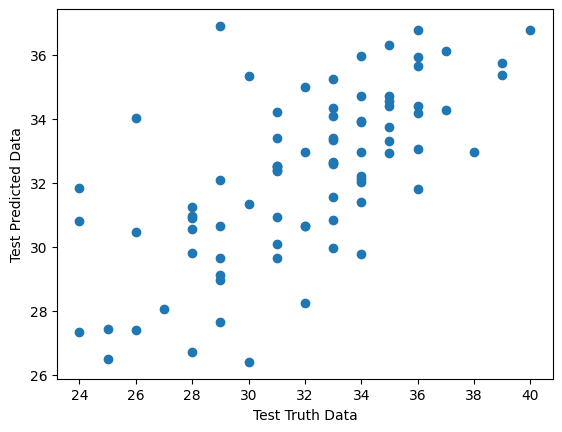

In [29]:
plt.scatter(y_test, reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [30]:
residuals = y_test-reg_pred

In [31]:
reg_pred

array([32.03122366, 34.38519209, 28.04039576, 29.80428363, 33.39357996,
       32.52652019, 27.4307263 , 35.24325527, 35.3299537 , 34.7162658 ,
       30.65320098, 34.69630788, 27.33869688, 32.63378429, 35.91658563,
       30.83637619, 29.65391674, 27.63108279, 31.4095626 , 34.34147727,
       32.96778904, 30.09678951, 36.76667038, 30.55288989, 32.20523811,
       32.10640075, 34.20215498, 36.12478549, 30.94447693, 32.62513298,
       36.31138088, 30.65612027, 33.03868471, 32.94551532, 30.65479884,
       32.35325778, 29.76779726, 34.39513108, 26.39592115, 32.97115387,
       36.78514563, 26.69116263, 34.07318273, 29.64708321, 33.34147283,
       34.26603161, 32.06740191, 34.1823819 , 32.49492446, 31.25387395,
       32.53138772, 31.56396515, 30.47189822, 35.95852512, 29.1172611 ,
       35.64750648, 30.93738756, 32.59067379, 28.95886268, 34.98847973,
       29.95684783, 32.39022011, 31.31858674, 33.73364984, 35.74610233,
       31.83455858, 35.3513894 , 28.22406752, 33.30408169, 30.90

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

7.507711926898554
2.0994851056315365
2.7400204245404


In [33]:
## R square
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)

0.43577354525232626


In [34]:
import pickle
pickle.dump(regression, open("Linear_regression.pkl", 'wb'))

## Ridge Regression

In [35]:

from sklearn.linear_model import Ridge
grid = dict()
grid['alpha']= np.arange(0,1,0.01)


model = Ridge()

scoring ={'rsquared':'r2','mean_squared_error':'neg_mean_squared_error'}
search = GridSearchCV(model, grid, cv=10, refit = 'rsquared',scoring =scoring )
result = search.fit(X_train,y_train)

In [36]:
print('Best Score: %s' % result.best_score_ )
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.5193146520252077
Best Hyperparameters: {'alpha': 0.99}


## KNN Regression

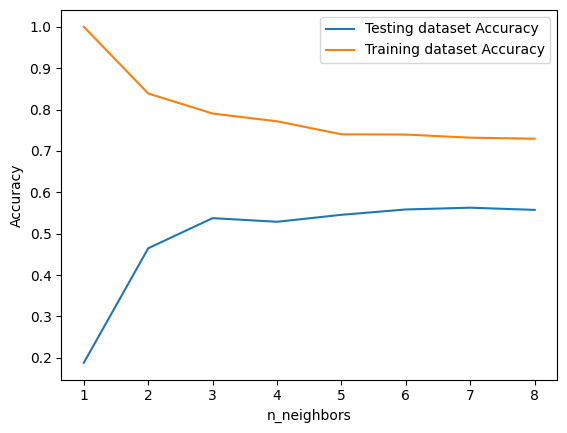

In [37]:
from sklearn.neighbors import KNeighborsRegressor
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [38]:
KNN_Params = [{"n_neighbors":np.arange(5,15,1),"weights":['uniform', 'distance'],"p":[1,2]}]
model = KNeighborsRegressor()
KNN_FIT = GridSearchCV(model, KNN_Params, cv=10, refit = 'rsquared',scoring =scoring )
KNN_result = KNN_FIT.fit(X_train,y_train)
print('Best Score: %s' % KNN_result.best_score_ )
print('Best Hyperparameters: %s' % KNN_result.best_params_)

Best Score: 0.6176007821255084
Best Hyperparameters: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}


In [39]:
## KNeighborsRegressor

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=7)
neigh.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [40]:
neigh.score(X_train,y_train)
knn_pred = neigh.predict(X_test)

In [41]:
## R square
from sklearn.metrics import r2_score
score = r2_score(y_test, knn_pred)
print(score)

0.5628860923306805


## Decision tree regressor

In [42]:
from sklearn.tree import DecisionTreeRegressor
dt_paramas = [{'random_state':0,"min_samples_leaf":np.arange(0,20,1),"random_state":np.arange(0,3,1)}]
regressor = DecisionTreeRegressor()
DT_FIT = GridSearchCV(regressor,param_grid = dt_paramas,cv = 10,refit = 'rsquared')
DT_result = DT_FIT.fit(X_train_unscl,y_train_unscl)
print('Best Score: %s' % DT_result.best_score_ )
print('Best Hyperparameters: %s' % DT_result.best_params_)

Best Score: 0.4950420360124637
Best Hyperparameters: {'min_samples_leaf': 12, 'random_state': 0}


In [43]:
from sklearn.tree import DecisionTreeRegressor
DT_regressor = DecisionTreeRegressor(min_samples_leaf=12,random_state=0)
DT_regressor.fit(X_train_unscl,y_train_unscl)
DT_predict = DT_regressor.predict(X_test_unscl)


In [44]:
score = r2_score(y_test_unscl, DT_predict)
print(score)

0.4276574291363573


In [45]:
import xgboost as xg

In [60]:


model = xg.XGBRegressor()
import numpy as np
xg_params = [{'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}]

xg_fit = GridSearchCV(model,param_grid = xg_params, cv =10,refit = 'rsquared')

xg_result = xg_fit.fit(X_train,y_train)
print('Best Score: %s' % xg_result.best_score_ )
print('Best Hyperparameters: %s' % xg_result.best_params_)

Best Score: 0.684767025050857
Best Hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:squarederror', 'subsample': 0.7}


In [62]:
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
rf = RandomForestRegressor()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 50)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



regressor =GridSearchCV(rf,param_grid = random_grid, cv =10,refit = 'rsquared')

regressor.fit(X_train,y_train)


# Use the forest's predict method on the test data
predictions = regressor.predict(X_test)
# Calculate the absolute errors
score = r2_score(predictions , y_test)
# Print out the mean absolute error (mae)
print('Mean  Error:', score, 'degrees.')


KeyboardInterrupt: 

In [65]:
X_train.columns

Index(['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'month',
       'Classes', 'region'],
      dtype='object')